
**PURPOSE OF THIS MARKET BASKET ANALYSIS**

The major goal of this analysis is to find items that customers like to buy. Market basket analysis will help sales and marketing teams develop more effective product placement, pricing, cross-sell, and up-sell tactics.
It would help the store optimize sales strategies, inventory management, and customer experience by leveraging patterns in customer purchase behavior.

<br>


**REQUIREMENTS FOR ANALYSIS**

*   Data Preparation
*   Exploratory Data Analysis
*   Market Basket Analysis
*   Visualization
*   Recommendations
*   Presentation


<br>




**STEP 1: Data Preparation**

In [2]:
# Load the data

from google.colab import files
uploaded = files.upload()

Saving Market Basket Analysis - Groceries_dataset.csv to Market Basket Analysis - Groceries_dataset.csv


In [3]:
!pip install wordcloud

In [5]:
# Import Packages

from os import path
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
# Read the data

import io
market = pd.read_csv(io.BytesIO(uploaded['Market Basket Analysis - Groceries_dataset.csv']))
market.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [7]:
# Group Items - This will provide us with a list of products purchased in the same transaction:

market['single_transaction'] = market['Member_number'].astype(str)+'_'+market['Date'].astype(str)
market.head()

,Member_number,Date,itemDescription,single_transaction
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015
3,1187,12-12-2015,other vegetables,1187_12-12-2015
4,3037,01-02-2015,whole milk,3037_01-02-2015


In [8]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Member_number       38765 non-null  int64 
 1   Date                38765 non-null  object
 2   itemDescription     38765 non-null  object
 3   single_transaction  38765 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [9]:
#convert Member number from integer to string
market['Member_number'] = market['Member_number'].astype(str)

In [10]:
# Convert the date column into datetime format
market['Date'] = pd.to_datetime(market['Date'], dayfirst=True)

In [11]:
market.info()

market.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Member_number       38765 non-null  object        
 1   Date                38765 non-null  datetime64[ns]
 2   itemDescription     38765 non-null  object        
 3   single_transaction  38765 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ MB


(38765, 4)

This dataset now has 4 features (columns) and 38765 observations (rows).

All features have the right data types.

In [12]:
# Check for null values
market.isna().sum()

Member_number         0
Date                  0
itemDescription       0
single_transaction    0
dtype: int64

There are no missing values.

In [13]:
# Check for duplicates

market.duplicated().sum()

759

**SUMMARY**
1. The dataset is almost clean.
2. It does not contain any missing values.
3. All the features have the right data type.
4. It contains 759 duplicated observations.




The duplicated rows will be dropped. There are no time stamps in the date to verify that members purchased same items on the same day but different times. In absence of this, all duplicated rows will be treated as data entry errors and will be dropped.

In [14]:
# Drop Duplicates

market.drop_duplicates(inplace=True)

# Check cleaned dataframe

market.shape

(38006, 4)

The dataset now contains 38006 rows and 4 columns after the duplicates have been removed.

**STEP 2: Exploratory Data Analysis**

<br>

What features will help support our investigation into the feature(s) of interest?

<br>

*   Count of unique customers
*   Count of unique items
*   Most frequent buyers
*   Average visits per customer
*   Average items per customer
*   Least frequent buyers
*   Most purchased and least purchased items
*   Total Sales for each year and annual percentage increase
*   Monthly sales for each year











**Count of unique customers**

In [15]:
# Count the number of unique customers
no_of_customers = market['Member_number'].nunique()
print("Total number of unique customers is: {}".format(no_of_customers))

Total number of unique customers is: 3898


**Count of unique items**

In [16]:
# Count the number of unique items
no_of_items = market['itemDescription'].nunique()
print("The number of unique items purchased is: {}".format(no_of_items))

The number of unique items purchased is: 167


**Most frequent buyers**

In [17]:
# Most frequent buyers (Get the member number and the number of dates they have visited the store to calculate the number of visits)
most_frequent_buyers = market.groupby('Member_number')['Date'].nunique().sort_values(ascending=False)
most_frequent_buyers.head(10)

Member_number
2271    11
1379    11
4338    11
3737    11
2193    11
3593    10
1052    10
2625    10
3484    10
4217    10
Name: Date, dtype: int64

In [18]:
# Get the buyers who have purchased the most items
items_per_customer = market['Member_number'].value_counts().sort_values(ascending=False)
print("Customers who have purchased the most items")
items_per_customer.head(10)

Customers who have purchased the most items


3180    35
3737    33
3050    32
2051    31
3915    30
2433    30
2625    30
2851    29
2394    29
3872    29
Name: Member_number, dtype: int64

**Average number of visits and average number of items purchased per customer**

In [19]:
# Average number of visits per customer
avg_visits = most_frequent_buyers.mean()
print("The average number of visits per customer is: {}".format(round(avg_visits)))

The average number of visits per customer is: 4


In [20]:
# Average number of items per customer
avg_items_per_customer = items_per_customer.mean()
print("The average items bought per customer is: {}\n".format(round(avg_items_per_customer)))

The average items bought per customer is: 10



**Least frequent buyers**

In [21]:
#Least frequent buyers
least_frequent_buyers = market.groupby('Member_number')['Date'].nunique().sort_values(ascending=True)
least_frequent_buyers.head(10)

Member_number
3788    1
3823    1
3824    1
3825    1
3826    1
3845    1
1745    1
3853    1
3858    1
3874    1
Name: Date, dtype: int64

In [22]:
# The number of buyers who have visited the store less than the average number of visits per customer (4)
least = least_frequent_buyers[least_frequent_buyers < 4]
print("Number of buyers who visited the store less than 4 times: {}".format(len(least)))

Number of buyers who visited the store less than 4 times: 1849


In [23]:
# The percentage of customers who have visited less than average number of visits per customer (4)
perc = float(len(least)/market['Member_number'].nunique()*100)
print(f"{round(perc, 2)} percent of the total customers visited less than the average number of visits per customer")

47.43 percent of the total customers visited less than the average number of visits per customer


In [24]:
# Count the least frequent buyers
customers = market['Member_number'].value_counts()

# Number of customers who have purchased less than 10 items
less_than_10 = len(customers[customers < 10])
perc = round(less_than_10 / market['Member_number'].nunique() * 100, 2)

print("Number of customers who have bought less than 10 items: {}".format(less_than_10))
print("That is {} percent of the total customers".format(perc))
customers.tail(10)

Number of customers who have bought less than 10 items: 2061
That is 52.87 percent of the total customers


4247    2
2783    2
2572    2
2417    2
2717    1
4816    1
4029    1
4151    1
4565    1
2640    1
Name: Member_number, dtype: int64

**Most purchased and least purchased items**

In [25]:
# Top 10 most purchased items
bought_items = market['itemDescription'].value_counts()
print("Top 10 most bought items")
bought_items.head(10)

Top 10 most bought items


whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: itemDescription, dtype: int64

In [26]:
# Top 10 least bought items
print("10 least bought items")
bought_items.tail(10)

10 least bought items


whisky                   8
salad dressing           6
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
bags                     4
baby cosmetics           3
kitchen utensil          1
preservation products    1
Name: itemDescription, dtype: int64

** Total Sales for each year and annual percentage increase**


<br>
Count items purchased every year & percentage increase in items purchased

In [27]:
# Extract day, month and year information and create new columns
market['Day'] = market['Date'].dt.day
market['Month'] = market['Date'].dt.strftime('%B')
market['Year'] = market['Date'].dt.year
market.head(4)

,Member_number,Date,itemDescription,single_transaction,Day,Month,Year
0,1808,2015-07-21,tropical fruit,1808_21-07-2015,21,July,2015
1,2552,2015-01-05,whole milk,2552_05-01-2015,5,January,2015
2,2300,2015-09-19,pip fruit,2300_19-09-2015,19,September,2015
3,1187,2015-12-12,other vegetables,1187_12-12-2015,12,December,2015


In [28]:
# Get the items purchased for each year
yearly_sales = market['Year'].value_counts()

In [29]:
# Percentage increase in items purchased
y2015 = len(market[market['Year'] == 2015])
y2014 = len(market[market['Year'] == 2014])
perc = (y2015 - y2014) / y2014 * 100
print("Percentage increase of the items purchased between 2014 and 2015: {}".format(round(perc, 2)))
yearly_sales

Percentage increase of the items purchased between 2014 and 2015: 10.85


2015    19981
2014    18025
Name: Year, dtype: int64

**Monthly Sales for each year**

In [30]:
# monthly sales for each month through the years
monthly_sales = market.pivot_table(index='Month', columns='Year', values='Member_number', aggfunc='count')

month_highest_sales = market['Month'].mode()[0]
print("The month with the highest cumulative items purchased is {}".format(month_highest_sales))
monthly_sales

The month with the highest cumulative items purchased is August


Year,2014,2015
Month,,
April,1533,1661
August,1556,1875
December,1453,1504
February,1409,1517
January,1499,1751
July,1557,1683
June,1551,1656
March,1384,1671
May,1595,1753


**STEP 3: Market Basket Analysis**

In [31]:
#Pivoting the table to convert items into columns and transactions into rows

market2 = pd.crosstab(market['single_transaction'], market['itemDescription'])
market2.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#encoding values to 0 and 1

def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

basket_input = market2.applymap(encode)

In [33]:
# Using Apriori algorithm to compute frequent itemsets

frequent_itemsets = apriori(basket_input, min_support=0.005, use_colnames=True)
print("\nFrequent itemsets count: {}\n".format(len(frequent_itemsets)))

# Generate rules using lift metric
rules = association_rules(frequent_itemsets, metric="lift")

print("\nAssociation rules for all items:")
rules.sort_values(by='zhangs_metric', ascending=False).head(10)


Frequent itemsets count: 126


Association rules for all items:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
8,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
34,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
35,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
30,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
31,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
1,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
0,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
33,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
32,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


In [34]:
# Print rules that show association, zhangs metric above 0
print("Rules that show a strong association:\nThese are items that are most likely to be bought together")
rules[rules['zhangs_metric'] > 0][['antecedents', 'consequents']]

Rules that show a strong association:
These are items that are most likely to be bought together


,antecedents,consequents
8,(frankfurter),(other vegetables)
9,(other vegetables),(frankfurter)
30,(soda),(sausage)
31,(sausage),(soda)
34,(yogurt),(sausage)
35,(sausage),(yogurt)


**STEP 4: Visualization**

**Average number of items purchased per customer**

Using a histogram to visualize the average number of items a customer buys:

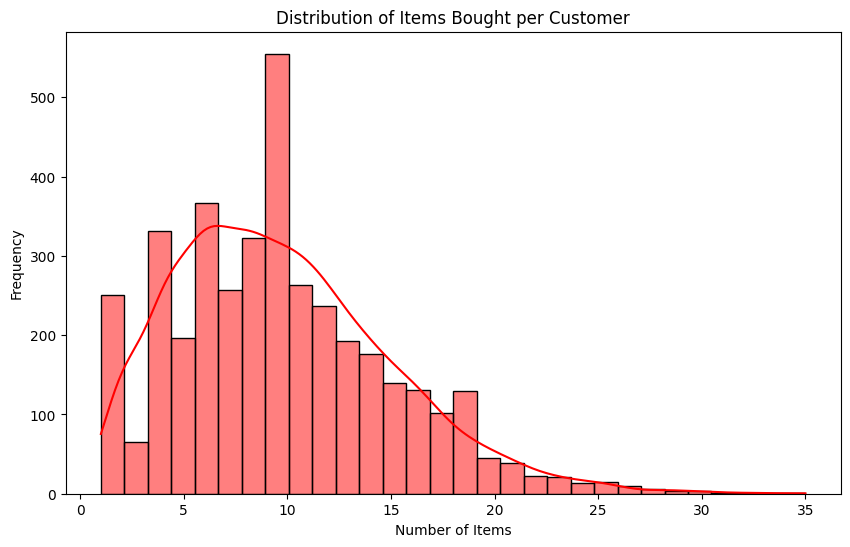

In [35]:
# Visualization: Distribution of items bought per customer
plt.figure(figsize=(10, 6))
sns.histplot(market['Member_number'].value_counts(), bins=30, kde=True, color='red')
plt.title('Distribution of Items Bought per Customer')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

**Distribution of visits per customer**

This shows the counts of unique purchases done by each customer.

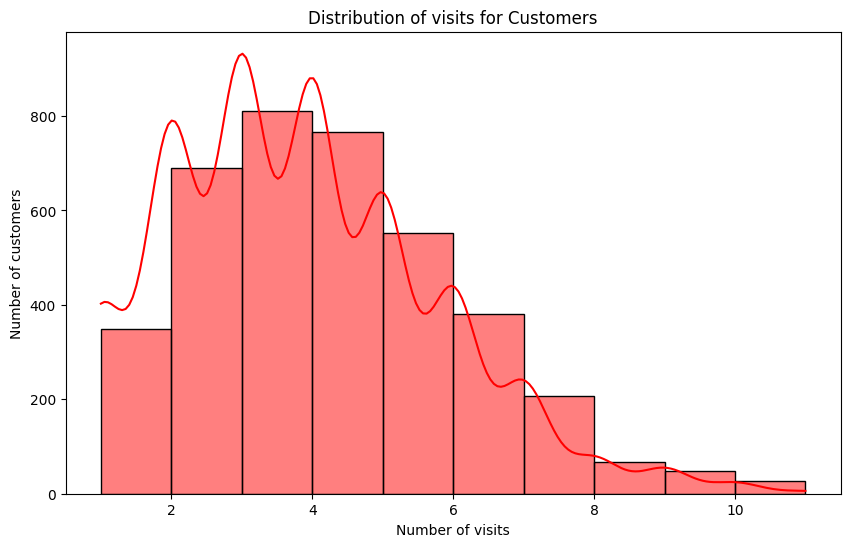

In [36]:
#Visualization: Distribution of visits per customer
plt.figure(figsize=(10, 6))
sns.histplot(market.groupby('Member_number')['Date'].nunique(), bins=10, kde=True, color='red')
plt.title('Distribution of visits for Customers')
plt.xlabel('Number of visits')
plt.ylabel('Number of customers')
plt.show()

**Top 10 customers with the highest number of items purchased**

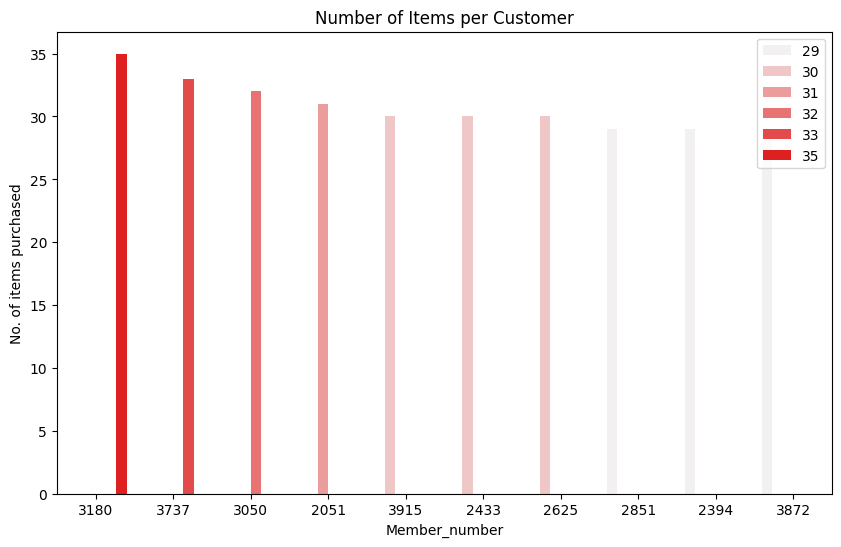

In [37]:
#Visualization: Top 10 customers in terms of items purchased
items_per_customer = market['Member_number'].value_counts().sort_values(ascending=False)
top_ten_cst = items_per_customer.head(10)
# Create a DataFrame from items_per_customer
top_ten = top_ten_cst.reset_index()
top_ten.columns = ['Member_number', 'Count']

# Create the barplot
plt.figure(figsize=(10,6))
sns.barplot(data=top_ten, x='Member_number', y='Count', hue='Count', color='red', order=top_ten.sort_values('Count',ascending = False)['Member_number'] )
plt.title('Number of Items per Customer')
plt.ylabel('No. of items purchased')
plt.legend(loc='best')
plt.show()

**Monthly sales count for every year**
<br>

This visualization shows the total items sold for every month through the years.

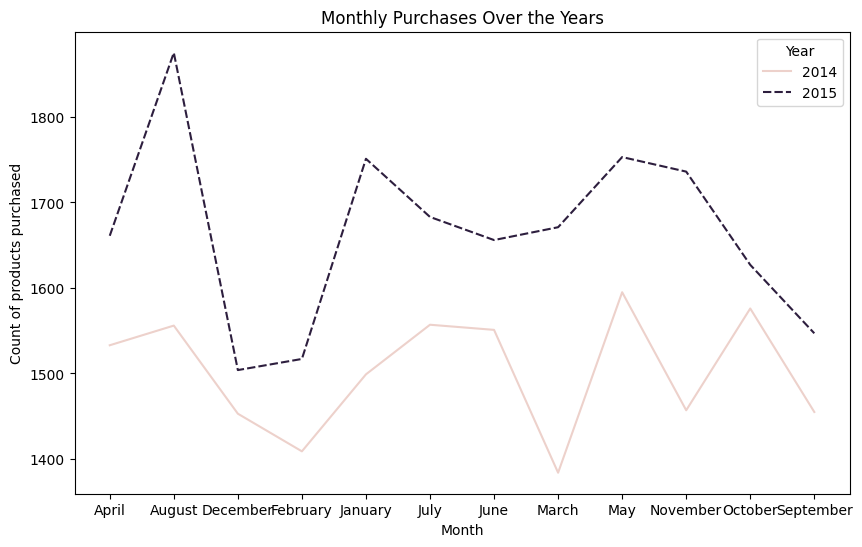

In [38]:
#Create a dataframe out of monthly_Sales pivot table
monthly_sales = market.pivot_table(index='Month', columns='Year', values='Member_number', aggfunc='count')
monthly_sales_df = monthly_sales.reset_index()

# Melt the DataFrame to have Year as a column
monthly_sales_melted = monthly_sales_df.melt(id_vars='Month', var_name='Year', value_name='Sales count')
plt.figure(figsize=(10, 6))

# Create a line plot showing trends per month for the different years
sns.lineplot(data=monthly_sales_melted,  x='Month', y='Sales count', hue='Year', style='Year', color='red')
plt.title('Monthly Purchases Over the Years')
plt.xlabel('Month')
plt.ylabel('Count of products purchased')

plt.show()

Top 10 Selling Items

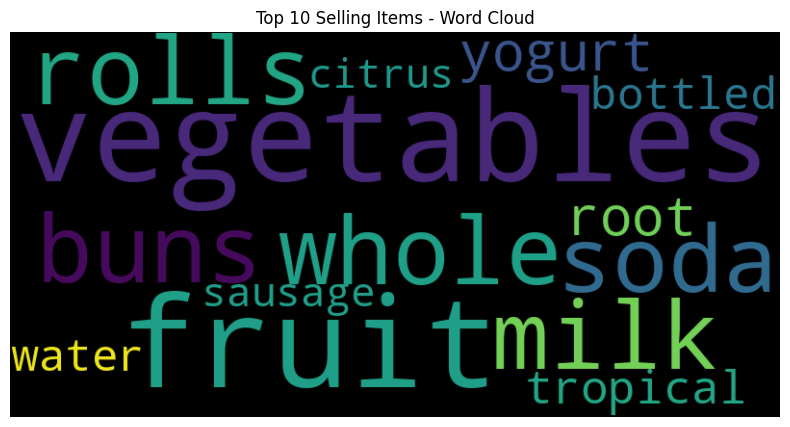

In [39]:
# Visualization: Top 10 selling items

# List of top 10 selling items
top_items = {'whole milk': 2502,
             'other vegetables': 1898,
             'rolls/buns': 1716,
             'soda': 1514,
             'yogurt': 1334,
             'root vegetables': 1071,
             'tropical fruit': 1032,
             'bottled water': 933,
             'sausage': 924,
             'citrus fruit': 812
             }

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(top_items))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Selling Items - Word Cloud')
plt.show()

Top 10 Least Selling Items

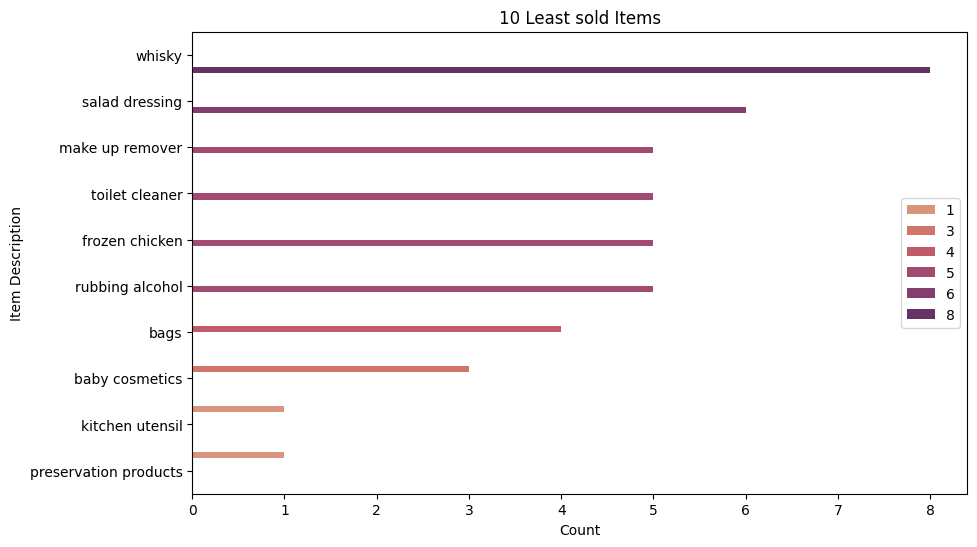

In [43]:
# 10 least sold items
bought_items = market['itemDescription'].value_counts().tail(10)
#set the palette color
palette = sns.color_palette("flare", 6)
plt.figure(figsize=(10, 6))
sns.barplot(y=bought_items.index, x=bought_items.values, hue=bought_items.values, palette=palette)
plt.title('10 Least sold Items')
plt.xlabel('Count')
plt.ylabel('Item Description')
plt.show()

Items Frequently Bought Together

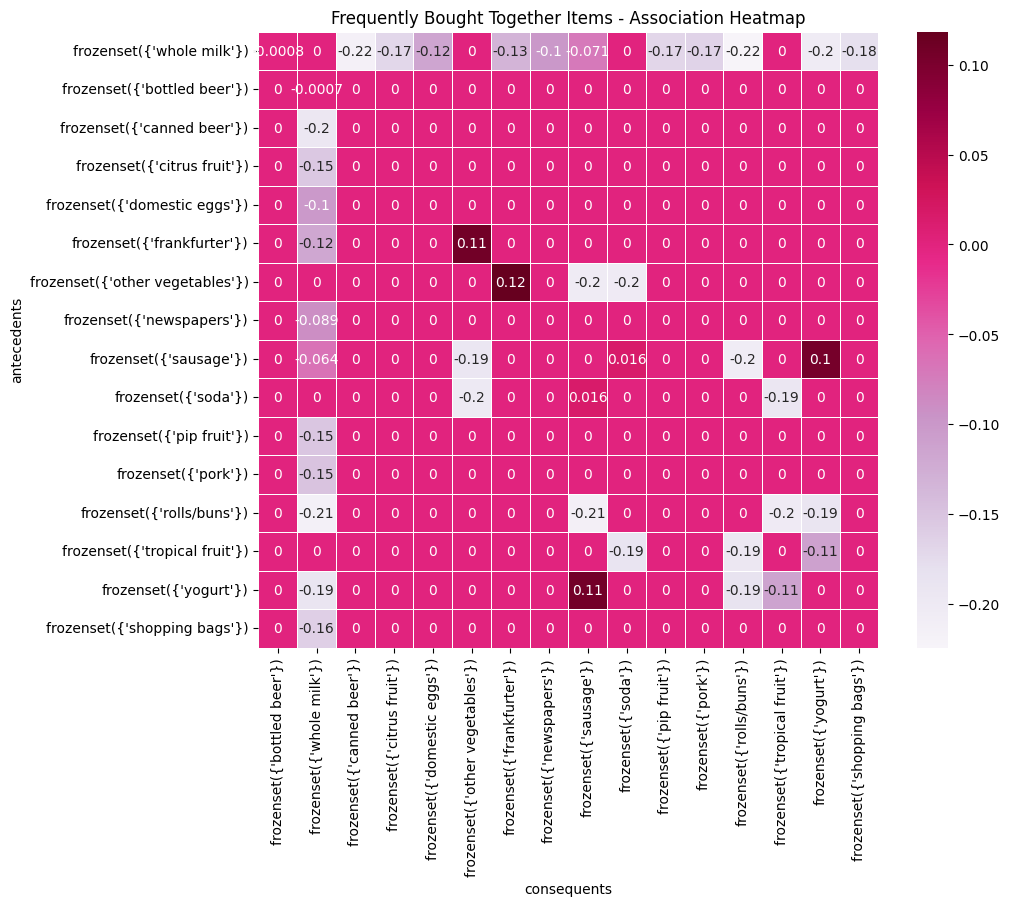

In [45]:
# Create a matrix of product associations
product_associations = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap of all associations
plt.figure(figsize=(10, 8))
sns.heatmap(product_associations, annot=True, cmap="PuRd", fmt=".2g", linewidths=.5)
plt.title("Frequently Bought Together Items - Association Heatmap")
plt.show()

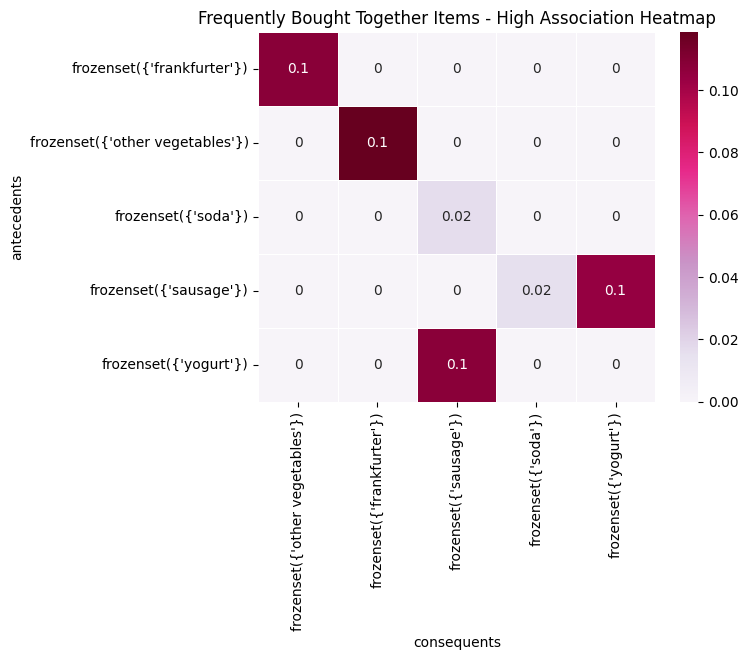

In [47]:
# Visualization: Products with High Association

# Heatmap for products with high association
nr = rules[rules['zhangs_metric'] > 0]
strong_association = nr.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)
sns.heatmap(strong_association, annot=True, cmap="PuRd", fmt=".1g", linewidths=.5)
plt.title("Frequently Bought Together Items - High Association Heatmap")
plt.show()

**STEP 5: Interpretation and Insights**

**EXPLORATORY ANALYSIS**

<br>

* The count of unique customers tallies up to 3898 individuals.
* A total of 167 distinct items were purchased within the dataset.
* On average, each customer visited the store approximately four times.
* Nearly half of the customers, specifically 1849 individuals, made fewer than four visits, accounting for 47.43% of the overall customer base.
The remaining 52.57% of customers visited the store more frequently than four times.
* The average number of items bought per customer is approximately 10, with a notable contingent of over 500 customers falling into this category.
* A substantial portion, constituting 52.87% of the total customers, purchased less than 10 items.
* Generally, as the count of items purchased per customer increases, the number of customers making such purchases diminishes, indicating a trend toward smaller purchases by most customers.
* Comparing data between 2014 and 2015, there was an observed increase of 10.85% in the total items purchased.
* August emerged as the month with the highest cumulative item purchases, while December registered the lowest.
* Notably, there are noticeable fluctuations in the volume of items sold across different months, indicating significant peaks and troughs in sales over time.










**MARKET BASKET ANALYSIS**

<br>


* The most commonly purchased items include whole milk, other vegetables, rolls/buns, soda, and yogurt.
* There's a notable correlation between the purchase of frankfurters and other vegetables, indicated by a lift of 0.1. This implies that customers who purchase frankfurters are 10% more inclined to buy other vegetables compared to those who don't buy frankfurters.
* There's a purchasing pattern where sausages often accompany yogurt in shopping baskets, suggesting a tendency among customers who buy sausages to also purchase yogurt.
* Additionally, there's a moderate association observed between the purchase of soda and sausages.







**STEP 6: Recommendations**



1.  Encourage higher volume purchases by introducing incentives for customers buying in larger quantities. This strategy aims to attract those who frequently purchase large amounts while still catering to those who buy smaller quantities.
2. Investigate the significant percentage of customers who have made fewer than four purchases. Understanding whether this is due to customer turnover or occasional bulk purchases can inform targeted retention efforts.
3. Implement a customer segmentation approach considering shopping frequency and average basket size. This allows tailored strategies: incentivizing infrequent shoppers to return more often and rewarding loyal, frequent buyers with exclusive perks.
4. Leverage seasonal trends for strategic marketing campaigns, identifying and capitalizing on months with lower sales through targeted promotions.
5. Group frequently purchased items together, like sausages and soda or other vegetables and frankfurters, to streamline shopping experiences and potentially boost sales through convenient pairings.
6. Employ cross-selling promotions to highlight complementary products. Offer discounts on related items when a customer purchases a specific product or use personalized notifications based on past purchases to suggest items of interest.








